<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2012/Assignment-A/s12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-oysnppxx
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-oysnppxx
     |████████████████████████████████| 634kB 4.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=3aee93a09f02fbc377ecd171deb59a134c6940f36aacc772e0ad0c4cdd62c7b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-7bv1g2po/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=0bc253956392d6a74514ad66f48ad18c7307417ebe12c4455e857c7533c6f9a0
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [2]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/eva_files'
sys.path.append(folder)

In [4]:
%matplotlib inline
import torch
import tinyImageNet
import tinyImageNet_data_loading
import show_images
import albumentationtransform
import train_and_test
import evaluate
import gradcam
import lr_finder

  pip install torch-lr-finder -v --global-option="amp"


In [6]:
import albumentations as A

mean =  0.4420803025777072
std = 0.2782284187926345

train_transform = albumentationtransform.AlbumentationTransforms(
    [ 
    A.PadIfNeeded(min_height=68, min_width=68, p=1.0),
     A.RandomCrop(64, 64, always_apply=False, p=1.0),
     A.HorizontalFlip(always_apply=False, p=0.5),
     A.Rotate(limit=20, p=0.5), 
     A.Cutout(num_holes=2, max_h_size=16,max_w_size = 16,p=1,fill_value=mean*255), 
     A.Normalize(mean=(mean,mean,mean), std=(std,std,std)),
             
             ])
            
test_transform = albumentationtransform.AlbumentationTransforms(
    [
     A.Normalize(mean=(mean,mean,mean), std=(std,std,std)),
     ])

train_dataset , test_dataset,classes = tinyImageNet.TinyImageNetDataSet(train_split = 70,test_transforms = test_transform,train_transforms = train_transform)

In [0]:
trainloader, testloader = tinyImageNet_data_loading.load(train_dataset,test_dataset,batch_size=512)

In [0]:
import matplotlib.pyplot as plt

In [10]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = dnn_architecture.Resnet18_TinyImageNet(num_classes=200).to(device)
summary(model, input_size=(3, 64, 64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler 

In [12]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = dnn_architecture.Resnet18_TinyImageNet(num_classes=200).to(device)

EPOCHS = 15
l_rate = []
optimizer = optim.SGD(model.parameters(), lr=0.05,momentum=0.9) 
criterion = nn.CrossEntropyLoss()
scheduler = scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, last_epoch=-1)
train_test = train_and_test.Train_test()
i=0
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    l_rate.append(optimizer.param_groups[0]['lr'] )
    train_acc,train_acc_epoch_end,train_losses,train_loss_epoch_end,test_losses,test_acc = train_test.train_and_test(model, device, trainloader,testloader, optimizer, criterion, epoch)
    scheduler.step()


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.05


Loss=4.194399833679199 Batch_id=150 Accuracy=5.73: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 2934/33000 (8.89%)

EPOCH: 2 LR: 0.05


Loss=3.792818546295166 Batch_id=150 Accuracy=13.79: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 3965/33000 (12.02%)

EPOCH: 3 LR: 0.05


Loss=3.38920259475708 Batch_id=150 Accuracy=20.46: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7537/33000 (22.84%)

EPOCH: 4 LR: 0.05


Loss=3.250248908996582 Batch_id=150 Accuracy=25.66: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7768/33000 (23.54%)

EPOCH: 5 LR: 0.05


Loss=2.893209218978882 Batch_id=150 Accuracy=29.98: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 8364/33000 (25.35%)

EPOCH: 6 LR: 0.05


Loss=2.7765800952911377 Batch_id=150 Accuracy=33.87: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 9541/33000 (28.91%)

EPOCH: 7 LR: 0.05


Loss=2.955470323562622 Batch_id=150 Accuracy=37.04: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 10989/33000 (33.30%)

EPOCH: 8 LR: 0.05


Loss=2.477729082107544 Batch_id=150 Accuracy=40.12: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 12246/33000 (37.11%)

EPOCH: 9 LR: 0.05


Loss=2.318844795227051 Batch_id=150 Accuracy=43.29: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 12599/33000 (38.18%)

EPOCH: 10 LR: 0.05


Loss=2.269595146179199 Batch_id=150 Accuracy=45.65: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 13021/33000 (39.46%)

EPOCH: 11 LR: 0.005000000000000001


Loss=1.820754885673523 Batch_id=150 Accuracy=54.11: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 15922/33000 (48.25%)

EPOCH: 12 LR: 0.005000000000000001


Loss=1.8028510808944702 Batch_id=150 Accuracy=56.03: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 16060/33000 (48.67%)

EPOCH: 13 LR: 0.005000000000000001


Loss=1.697929859161377 Batch_id=150 Accuracy=56.76: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 16143/33000 (48.92%)

EPOCH: 14 LR: 0.005000000000000001


Loss=1.8081064224243164 Batch_id=150 Accuracy=57.70: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 16290/33000 (49.36%)

EPOCH: 15 LR: 0.005000000000000001


Loss=1.7334036827087402 Batch_id=150 Accuracy=58.31: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]



Test set: Average loss: 0.0041, Accuracy: 16382/33000 (49.64%)



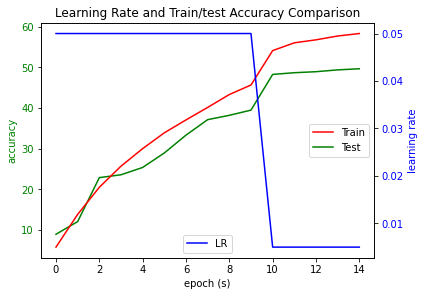

In [13]:
import numpy as np

fig, ax1 = plt.subplots()

ax1.set_xlabel('epoch (s)')
ax1.set_ylabel('accuracy', color='g')
testline, = ax1.plot( test_acc, color='g')
ax1.tick_params(axis='y', labelcolor='g')

trainline, = ax1.plot( train_acc_epoch_end, color='r')
ax1.legend((trainline, testline), ('Train', 'Test'), loc=7)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('learning rate', color='b')  # we already handled the x-label with ax1
lrline, = ax2.plot( l_rate, color='b')
ax2.legend((lrline, ), ('LR',), loc=8)
ax2.tick_params(axis='y', labelcolor='b')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Learning Rate and Train/test Accuracy Comparison")
plt.show()

In [0]:
import copy
model2 = copy.deepcopy(model)

In [15]:

EPOCHS = 15
optimizer = optim.SGD(model.parameters(), lr=0.005) 
criterion = nn.CrossEntropyLoss()
scheduler = scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2, last_epoch=-1)

for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    l_rate.append(optimizer.param_groups[0]['lr'] )
    train_acc,train_acc_epoch_end,train_losses,train_loss_epoch_end,test_losses,test_acc = train_test.train_and_test(model, device, trainloader,testloader, optimizer, criterion, epoch)
    scheduler.step()


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.005


Loss=1.5510754585266113 Batch_id=150 Accuracy=59.96: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 16575/33000 (50.23%)

EPOCH: 2 LR: 0.005


Loss=1.4830397367477417 Batch_id=150 Accuracy=60.17: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 16548/33000 (50.15%)

EPOCH: 3 LR: 0.005


Loss=1.689785122871399 Batch_id=150 Accuracy=60.25: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 16528/33000 (50.08%)

EPOCH: 4 LR: 0.005


Loss=1.5160281658172607 Batch_id=150 Accuracy=60.41: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 16582/33000 (50.25%)

EPOCH: 5 LR: 0.005


Loss=1.5918803215026855 Batch_id=150 Accuracy=60.39: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 16593/33000 (50.28%)

EPOCH: 6 LR: 0.001


Loss=1.6040594577789307 Batch_id=150 Accuracy=60.68: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 16612/33000 (50.34%)

EPOCH: 7 LR: 0.001


Loss=1.5009301900863647 Batch_id=150 Accuracy=60.99: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 16578/33000 (50.24%)

EPOCH: 8 LR: 0.001


Loss=1.4978764057159424 Batch_id=150 Accuracy=60.71: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 16596/33000 (50.29%)

EPOCH: 9 LR: 0.001


Loss=1.5786226987838745 Batch_id=150 Accuracy=60.69: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 16591/33000 (50.28%)

EPOCH: 10 LR: 0.001


Loss=1.5807193517684937 Batch_id=150 Accuracy=60.71: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 16590/33000 (50.27%)

EPOCH: 11 LR: 0.0002


Loss=1.748284101486206 Batch_id=150 Accuracy=60.79: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 16606/33000 (50.32%)

EPOCH: 12 LR: 0.0002


Loss=1.8815858364105225 Batch_id=150 Accuracy=60.89: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 16600/33000 (50.30%)

EPOCH: 13 LR: 0.0002


Loss=1.5497492551803589 Batch_id=150 Accuracy=60.87: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 16596/33000 (50.29%)

EPOCH: 14 LR: 0.0002


Loss=1.5887407064437866 Batch_id=150 Accuracy=60.68: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 16613/33000 (50.34%)

EPOCH: 15 LR: 0.0002


Loss=1.6102348566055298 Batch_id=150 Accuracy=61.01: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]



Test set: Average loss: 0.0040, Accuracy: 16608/33000 (50.33%)



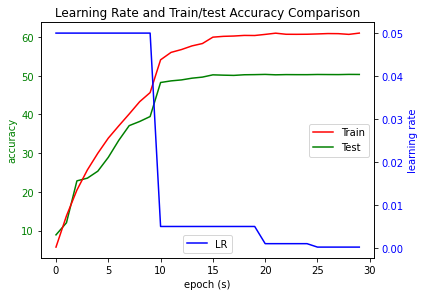

In [18]:
import numpy as np

fig, ax1 = plt.subplots()

ax1.set_xlabel('epoch (s)')
ax1.set_ylabel('accuracy', color='g')
testline, = ax1.plot( test_acc, color='g')
ax1.tick_params(axis='y', labelcolor='g')

trainline, = ax1.plot( train_acc_epoch_end, color='r')
ax1.legend((trainline, testline), ('Train', 'Test'), loc=7)
ax2 = ax1.twinx()  


ax2.set_ylabel('learning rate', color='b')  
lrline, = ax2.plot( l_rate, color='b')
ax2.legend((lrline, ), ('LR',), loc=8)
ax2.tick_params(axis='y', labelcolor='b')

fig.tight_layout()  
plt.title("Learning Rate and Train/test Accuracy Comparison")
plt.show()

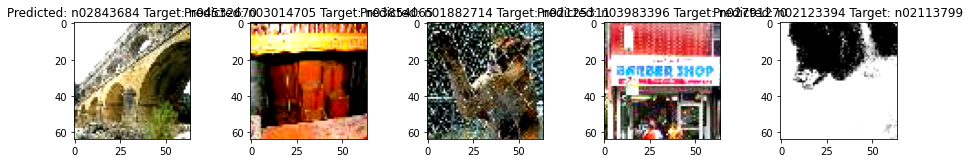

In [20]:
misclassify = show_images.show_misclassified_images(model, device, testloader,classes,num=5)

GroundTruth:  n03796401 n03930313 n01443537 n01774384 n03042490
Predicted:  n03796401 n03930313 n01443537 n01774384 n03042490


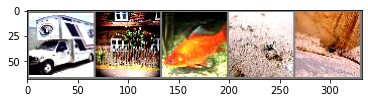

In [21]:
evaluate.show_predicted_actual(model, device, testloader, classes)

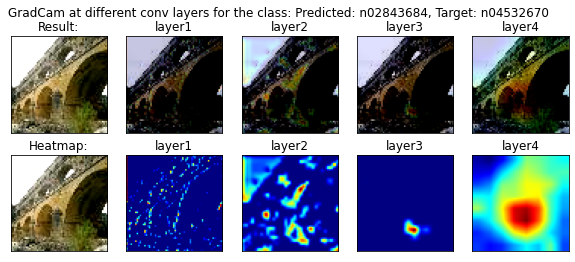

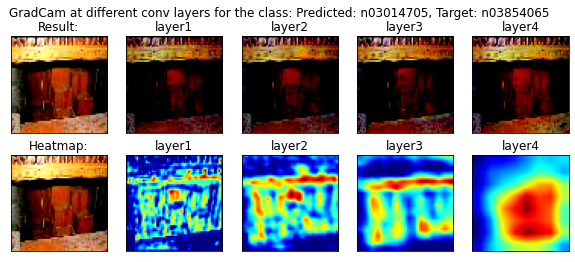

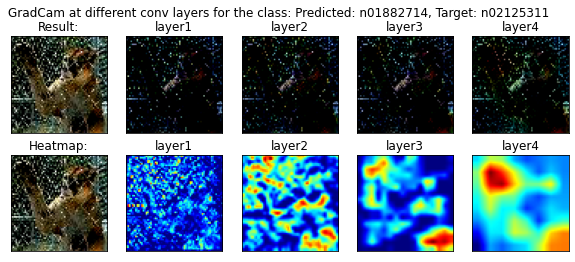

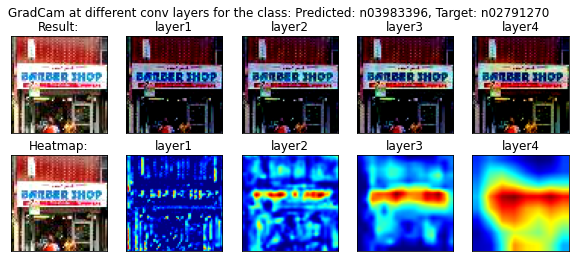

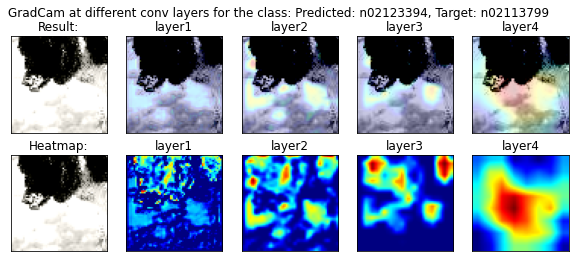

In [23]:
images=[]

for i in range(25):
  images.append(misclassify[0][i]*2-0.5)

target_layers = ["layer1","layer2","layer3","layer4"]
gradcam = gradcam.VisualizeCam(model,classes, target_layers)
gradcam(torch.stack(images), target_layers,target_class=misclassify[2],pred=misclassify[1],num=5,name='misclassify')